In [ ]:
#Logistics Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
#Load the dataset
df = pd.read_csv('/content/green_tech_data.csv')
df

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0
...,...,...,...,...,...
95,222.828459,414.288617,0.522243,4.688408,0
96,232.956490,753.360111,0.769994,4.362857,0
97,199.639356,907.399234,0.215821,2.430473,0
98,58.896694,898.377782,0.622890,3.878920,0


In [ ]:
df.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [ ]:
#Missing value
df.isnull().sum()

,0
carbon_emissions,0
energy_output,0
renewability_index,0
cost_efficiency,0
sustainability,0


In [ ]:
#Statistics of the dataset
df.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [ ]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [ ]:
df.columns

Index(['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency', 'sustainability'],
      dtype='object')

In [ ]:
#Feature Selection
X = df[['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency']]
y = df['sustainability']

In [ ]:
#Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()#Class
model.fit(X_train, y_train)#Train

LogisticRegression()

In [ ]:
#Predict
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
#Metrics
acc = accuracy_score(y_test, y_pred)
acc


0.95

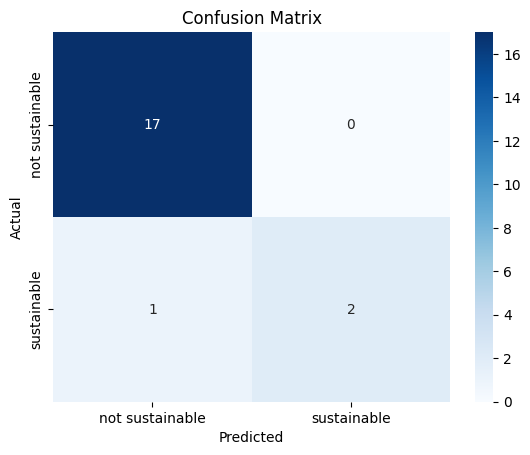

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['not sustainable', 'sustainable'],yticklabels=['not sustainable', 'sustainable'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Classification report
cr = classification_report(y_test, y_pred, target_names=['not sustainable','sustainable'])


In [ ]:
print(cr)

                 precision    recall  f1-score   support

not sustainable       0.94      1.00      0.97        17
    sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [ ]:
#Feature importance
coef = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coef)

                    Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092184
cost_efficiency       -1.259560


Decision Tree



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
#Load the dataset
data = pd.read_csv('/content/Renewable_Energy_Adoption.csv')
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [ ]:
data.columns

Index(['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency', 'adoption'],
      dtype='object')

In [ ]:
X = df[['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency']]
y = data['adoption']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=9)

In [ ]:
#model
model = DecisionTreeClassifier(max_depth=3, random_state=9)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=9)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.9285714285714286

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[57,  5],
       [ 0,  8]])

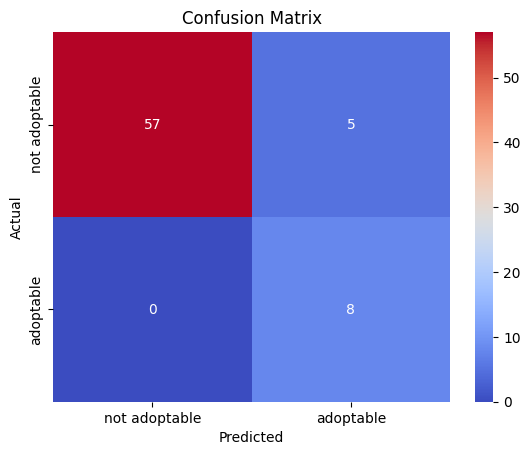

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['not adoptable', 'adoptable'],yticklabels=['not adoptable', 'adoptable'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
cr = classification_report(y_test, y_pred, target_names=['not adoptable','adoptable'])

In [ ]:
print(cr)

               precision    recall  f1-score   support

not adoptable       1.00      0.92      0.96        62
    adoptable       0.62      1.00      0.76         8

     accuracy                           0.93        70
    macro avg       0.81      0.96      0.86        70
 weighted avg       0.96      0.93      0.94        70



In [ ]:
#import plot tree
from sklearn.tree import plot_tree


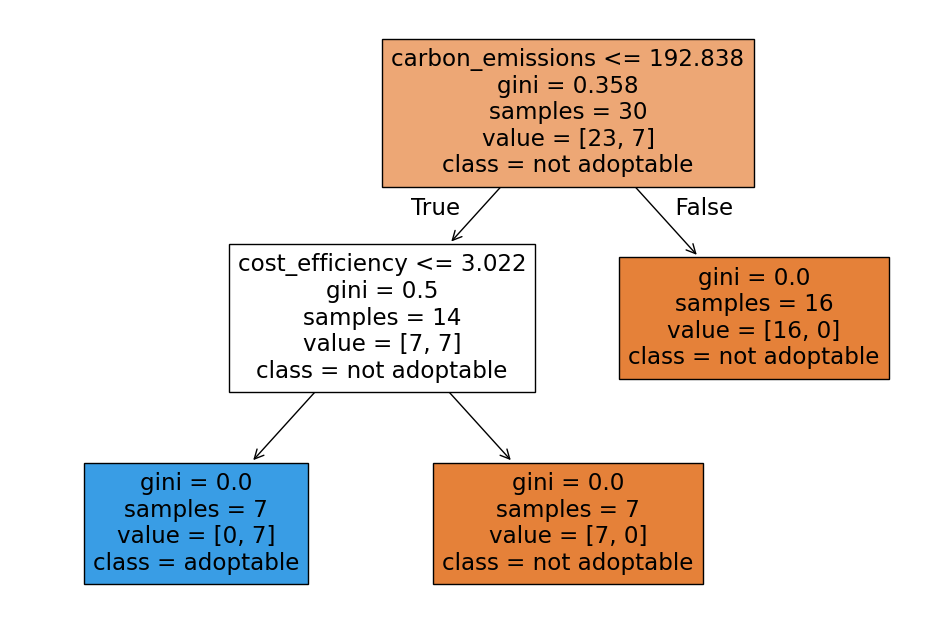

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['not adoptable', 'adoptable'])
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']

Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df_rf = pd.read_csv('/content/agricultural sustainability.csv')

In [ ]:
df_rf

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0
...,...,...,...,...,...,...
195,0.349210,9376.815930,2632.827381,442.455759,72.895518,0
196,0.725956,8725.714767,3504.009823,469.453227,279.328394,0
197,0.897110,4860.946246,1275.439420,304.309933,84.204658,0
198,0.887086,7757.839610,1365.300585,363.492871,287.559338,0


In [ ]:
df_rf.shape

(200, 6)

In [ ]:
df_rf.columns

Index(['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use', 'sustainability'],
      dtype='object')

In [ ]:
X = df_rf[['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use']]
y = df_rf['sustainability']

In [ ]:
#Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=60)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=60)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=60)

In [ ]:
#Prediction
rf_pred = rf_model.predict(X_test)
rf_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
rf_acc = accuracy_score(y_test, rf_pred)
rf_acc

1.0

In [ ]:
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cm

array([[36,  0],
       [ 0,  4]])

In [ ]:
rf_cr = classification_report(y_test, rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00         4

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Support Vector Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/waste management.csv')

In [ ]:
df.head(10)

,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
0,3,0.198716,0.016588,81.011339,0
1,1,0.005522,0.512093,86.707232,0
2,3,0.815461,0.226496,91.324055,0
3,3,0.706857,0.645173,51.134240,0
4,1,0.729007,0.174366,50.151629,0
5,1,0.771270,0.690938,79.829518,0
6,3,0.074045,0.386735,64.996393,0
7,2,0.358466,0.936730,70.196688,0
8,3,0.115869,0.137521,79.579267,0
9,3,0.863103,0.341066,89.000534,0


In [ ]:
df.columns

Index(['waste_type', 'material_composition', 'recycling_potential',
       'toxicity_level', 'management_strategy'],
      dtype='object')

In [ ]:
X = df[['waste_type', 'material_composition', 'recycling_potential',
       'toxicity_level', 'management_strategy']]
y = df['management_strategy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Initialize model
model = SVC(C=1.0, kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

SVC()

In [ ]:
#Prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.9

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[18,  0],
       [ 2,  0]])

In [ ]:
cr = classification_report(y_test, y_pred,target_names=['mgmt_str', 'nonmgmt_str'])
print(cr)

              precision    recall  f1-score   support

    mgmt_str       0.90      1.00      0.95        18
 nonmgmt_str       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K-Nearest Neighbour

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Load data
df_knn = pd.read_csv('/content/emissions_reduction_data.csv')
df_knn

,energy_efficiency,renewable_ratio,technology_cost,emission_reduction
0,68.727006,0.373641,7569.984799,0
1,97.535715,0.332912,2660.607960,0
2,86.599697,0.176154,4119.757249,0
3,79.932924,0.607267,6969.525732,1
4,57.800932,0.476624,5338.804101,0
...,...,...,...,...
9995,92.882799,0.877039,9570.479053,0
9996,94.875442,0.046814,7730.417901,0
9997,97.335396,0.303698,1175.102765,0
9998,69.874400,0.443320,4609.043582,0


In [ ]:
X = df_knn[['energy_efficiency', 'renewable_ratio', 'technology_cost']]
y = df_knn['emission_reduction']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [ ]:
knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knnmodel.predict(X_test)
knn_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
acc_knn = accuracy_score(y_test, knn_pred)
acc_knn

0.8325

In [ ]:
cm = confusion_matrix(y_test, knn_pred)
cm

array([[1524,  147],
       [ 188,  141]])

In [ ]:
cr = classification_report(y_test, knn_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1671
           1       0.49      0.43      0.46       329

    accuracy                           0.83      2000
   macro avg       0.69      0.67      0.68      2000
weighted avg       0.82      0.83      0.83      2000

